In [1]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# LOAD DATA

In [2]:
train = pd.read_csv("../input/Train_data.csv")
trainB = pd.read_csv("../input/Test_data.csv")

In [3]:
print(train.shape)

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

(25192, 42)
Training data has 25192 rows & 42 columns


In [4]:
print(trainB.shape)

print("Testing data has {} rows & {} columns".format(trainB.shape[0],trainB.shape[1]))

(22544, 41)
Testing data has 22544 rows & 41 columns


# EXPLORATORY ANALYSIS

In [5]:
# Descriptive statistics
train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
trainB.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(train['num_outbound_cmds'].value_counts())
print(trainB['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [8]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
trainB.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.drop(['dst_host_srv_count'],axis=1, inplace =True)
trainB.drop(['dst_host_srv_count'],axis=1, inplace =True)
train.drop(['src_bytes'],axis=1, inplace =True)
trainB.drop(['src_bytes'],axis=1, inplace =True)
train.drop(['flag'],axis=1, inplace =True)
trainB.drop(['flag'],axis=1, inplace =True)
train.drop(['dst_bytes'],axis=1, inplace =True)
trainB.drop(['dst_bytes'],axis=1, inplace =True)
train.drop(['same_srv_rate'],axis=1, inplace =True)
trainB.drop(['same_srv_rate'],axis=1, inplace =True)
train.drop(['dst_host_same_srv_rate'],axis=1, inplace =True)
trainB.drop(['dst_host_same_srv_rate'],axis=1, inplace =True)

In [9]:
# Attack Class Distribution
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

# SCALING NUMERICAL ATTRIBUTES

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_trainB = scaler.fit_transform(trainB.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_trainBdf = pd.DataFrame(sc_trainB, columns = cols)

# ENCODING CATEGORICAL ATTRIBUTES

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattrainB = trainB.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
trainBcat = cattrainB.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()


In [12]:
#cols = train.select_dtypes(include=['float64','int64']).columns
#colval = train.select_dtypes(include=['float64','int64'])
#sc_traindf = pd.DataFrame(colval, columns = cols)
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape

(25192, 34)

In [13]:
#cols = test.select_dtypes(include=['float64','int64']).columns
#colval = test.select_dtypes(include=['float64','int64'])
#sc_traindf = pd.DataFrame(colval, columns = cols)
trainB_df = pd.concat([sc_trainBdf,trainBcat],axis=1)

trainB_df.shape

(22544, 34)

# FEATURE SELECTION

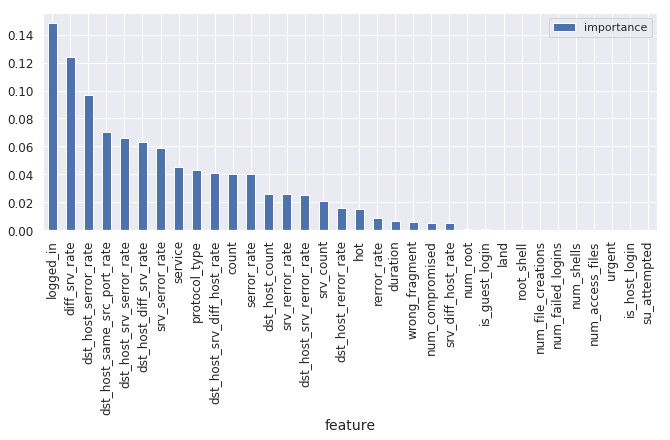

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [15]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

len(selected_features)

15

# DATASET PARTITION

In [16]:
from sklearn.model_selection import train_test_split
#train_x= train_x[selected_features]
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.80, random_state=35)
X_train,X_trainB,Y_train,Y_trainB = train_test_split(X_train,Y_train,train_size=0.50, random_state=25)
X_test,X_testB,Y_test,Y_testB = train_test_split(X_test,Y_test,train_size=0.50, random_state=25)
print(X_train.shape, Y_train.shape)
print(X_trainB.shape, Y_trainB.shape)
print(X_test.shape, Y_test.shape)
print(X_testB.shape, Y_testB.shape)

(10076, 34) (10076,)
(10077, 34) (10077,)
(2519, 34) (2519,)
(2520, 34) (2520,)


# FITTING MODELS

In [17]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
"""
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);
"""
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
t1=time.time()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=10)
DTC_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Decision Tree: ", t2-t1)
print()

t1=time.time()
XGB_Classifier = XGBClassifier(base_score=0.3, n_estimators=5)
XGB_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for XGBoost: ", t2-t1)
print()

t1=time.time()
RandomForest_Classifier = RandomForestClassifier(n_estimators=1)
RandomForest_Classifier.fit(X_train, Y_train)
t2=time.time()
print("Training time for Random Forest: ", t2-t1)
print()


Training time for Decision Tree:  0.05311012268066406

Training time for XGBoost:  0.11339807510375977

Training time for Random Forest:  0.028948068618774414



# EVALUATE MODELS

In [18]:
from sklearn import metrics
from sklearn.metrics import f1_score
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))



for i, v in models:
    scores = cross_val_score(v, X_test, Y_test, cv=10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test), digits=8)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8955947713006435

Model Accuracy:
 0.9027391822151647

Confusion matrix:
 [[1012  175]
 [  70 1262]]

Classification report:
               precision    recall  f1-score   support

     anomaly  0.93530499 0.85256950 0.89202292      1187
      normal  0.87821851 0.94744745 0.91152040      1332

   micro avg  0.90273918 0.90273918 0.90273918      2519
   macro avg  0.90676175 0.90000848 0.90177166      2519
weighted avg  0.90511873 0.90273918 0.90233282      2519



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9257630998060584

Model Accuracy:
 0.925764192139738

Confusion matrix:
 [[1018  169]
 [  18 1314]]

Classification report:
               precision    recall  f1-score   support

     anomaly  0.98262548 0.85762426 0.91587944      1187
      normal  0.88604

# VALIDATING MODELS

In [19]:
for i, v in models:
    t1=time.time()
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    t2=time.time()
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print("Prediction time of ", i, t2-t1)
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        



============================== Naive Baye Classifier Model Test Results ==============================

Prediction time of  Naive Baye Classifier 0.012201786041259766

Model Accuracy:
 0.9027391822151647

Confusion matrix:
 [[1012  175]
 [  70 1262]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      1187
      normal       0.88      0.95      0.91      1332

   micro avg       0.90      0.90      0.90      2519
   macro avg       0.91      0.90      0.90      2519
weighted avg       0.91      0.90      0.90      2519



============================== Decision Tree Classifier Model Test Results ==============================

Prediction time of  Decision Tree Classifier 0.012695550918579102

Model Accuracy:
 0.925764192139738

Confusion matrix:
 [[1018  169]
 [  18 1314]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.98      0.86      0.92      1187
    

# Functions to extract locations of FP, FN as a pandas series

# To generate the last row after NB prediction function 

In [20]:
def genPredRow(y_actual, y_pred):
    FP = []

    for i in range(len(y_pred)): 
        if y_pred[i]=='anomaly' and y_actual.iat[i]!=y_pred[i]:
           FP.append(1)
        elif y_pred[i]=='normal' and y_actual.iat[i]!=y_pred[i]:
           FP.append(1) 
        else:
            FP.append(0)
    return (pd.Series(FP))
    


# Combining Decision Tree and XG Boost

## Getting FP and FN row location from NB output as pd.Series

In [21]:
"""models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))

"""

t1= time.time()

##USING DECISION TREE TO PREDICT PREVIOUS VALUES
X_testB_XGB_DCT = X_testB.copy()
Y_testB_XGB_DCT = Y_testB.copy()
X_trainB_XGB_DCT = X_trainB.copy()
Y_trainB_XGB_DCT = Y_trainB.copy()
finalPred= genPredRow(Y_trainB_XGB_DCT, models[1][1].predict(X_trainB_XGB_DCT))
print("Size of number of FP:", finalPred.size) 

finalPredTest = genPredRow(Y_testB_XGB_DCT, models[1][1].predict(X_testB_XGB_DCT))

X_trainB_XGB_DCT['prevPred'] = np.array(finalPred)
X_testB_XGB_DCT['prevPred'] = np.array(finalPredTest)
print(X_trainB_XGB_DCT.shape)
print(X_testB.shape)



Size of number of FP: 10077
(10077, 35)
(2520, 34)


## PASSING X_TRAIN B TO TRAIN XGBOOST 


In [22]:
XGB_Classifier_DCT = XGBClassifier(base_score=0.3, n_estimators=5)
XGB_Classifier_DCT.fit(X_trainB_XGB_DCT, Y_trainB_XGB_DCT)
print()

t2=time.time()
print ("Training Time for Decision Tree and XG Boost: ", t2-t1)


Training Time for Decision Tree and XG Boost:  0.2317490577697754


## Testing new XG Boost Model

In [23]:
t1=time.time()
Y_testB_XGB_DCT_pred = XGB_Classifier_DCT.predict(X_testB_XGB_DCT)
t2=time.time()
print ("Prediction Time for Decision Tree and XG Boost: ", t2-t1)
print()
scores_XGB_DCT = cross_val_score(XGB_Classifier_DCT, X_testB_XGB_DCT, Y_testB_XGB_DCT, cv=10)
accuracy_XGB_DCT = metrics.accuracy_score(Y_testB_XGB_DCT, Y_testB_XGB_DCT_pred)
confusion_matrix_XGB_DCT = metrics.confusion_matrix(Y_testB_XGB_DCT,Y_testB_XGB_DCT_pred)
classification_XGB_DCT = metrics.classification_report(Y_testB_XGB_DCT,Y_testB_XGB_DCT_pred, digits=8)
print()
print('============================== {} Model Evaluation =============================='.format('Decision tree + XG Boost'))
print()
print ("Cross Validation Mean Score:" "\n", scores_XGB_DCT.mean())
print()
print ("Model Accuracy:" "\n", accuracy_XGB_DCT)
print()
print("Confusion matrix:" "\n", confusion_matrix_XGB_DCT)
print()
print("Classification report:" "\n", classification_XGB_DCT) 
print()
 

Prediction Time for Decision Tree and XG Boost:  0.00521087646484375


============================== Decision tree + XG Boost Model Evaluation ==============================

Cross Validation Mean Score:
 0.9912713222647399

Model Accuracy:
 0.9940476190476191

Confusion matrix:
 [[1177    0]
 [  15 1328]]

Classification report:
               precision    recall  f1-score   support

     anomaly  0.98741611 1.00000000 0.99366821      1177
      normal  1.00000000 0.98883098 0.99438413      1343

   micro avg  0.99404762 0.99404762 0.99404762      2520
   macro avg  0.99370805 0.99441549 0.99402617      2520
weighted avg  0.99412252 0.99404762 0.99404975      2520




# Combining Random Forest with XG BOOST 

In [24]:
"""models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))

"""

t1=time.time()
##USING DECISION TREE TO PREDICT PREVIOUS VALUES
X_testB_XGB_RF = X_testB.copy()
Y_testB_XGB_RF = Y_testB.copy()
X_trainB_XGB_RF = X_trainB.copy()
Y_trainB_XGB_RF = Y_trainB.copy()
finalPred= genPredRow(Y_trainB_XGB_RF, models[1][1].predict(X_trainB_XGB_RF))
print("Size of number of FP:", finalPred.size) 

finalPredTest = genPredRow(Y_testB_XGB_RF, models[1][1].predict(X_testB_XGB_RF))

X_trainB_XGB_RF['prevPred'] = np.array(finalPred)
X_testB_XGB_RF['prevPred'] = np.array(finalPredTest)
print(X_trainB_XGB_RF.shape)
print(X_testB.shape)




Size of number of FP: 10077
(10077, 35)
(2520, 34)


## Passing updated dataframe to XG BOOST

In [25]:
XGB_Classifier_RF = XGBClassifier(base_score=0.3, n_estimators=5)
XGB_Classifier_RF.fit(X_trainB_XGB_RF, Y_trainB_XGB_RF)
print()

t2=time.time()
print ("Training Time for Random Forest with XG BOOST: ", t2-t1)
print()


Training Time for Random Forest with XG BOOST:  0.22909212112426758



## Testing new XG Boost Model

In [26]:
t1=time.time()
Y_testB_XGB_RF_pred = XGB_Classifier_RF.predict(X_testB_XGB_RF)
t2=time.time()
print ("Prediction Time for Random Forest with XG BOOST: ", t2-t1)
print()
scores_XGB_RF = cross_val_score(XGB_Classifier_RF, X_testB_XGB_RF, Y_testB_XGB_RF, cv=10)
accuracy_XGB_RF = metrics.accuracy_score(Y_testB_XGB_RF, Y_testB_XGB_RF_pred)
confusion_matrix_XGB_RF = metrics.confusion_matrix(Y_testB_XGB_RF,Y_testB_XGB_RF_pred)
classification_XGB_RF = metrics.classification_report(Y_testB_XGB_RF,Y_testB_XGB_RF_pred, digits=8)
print()
print('============================== {} Model Evaluation =============================='.format('Random Forest + XG Boost'))
print()
print ("Cross Validation Mean Score:" "\n", scores_XGB_RF.mean())
print()
print ("Model Accuracy:" "\n", accuracy_XGB_RF)
print()
print("Confusion matrix:" "\n", confusion_matrix_XGB_RF)
print()
print("Classification report:" "\n", classification_XGB_RF) 
print()

Prediction Time for Random Forest with XG BOOST:  0.005087375640869141


============================== Random Forest + XG Boost Model Evaluation ==============================

Cross Validation Mean Score:
 0.9912713222647399

Model Accuracy:
 0.9940476190476191

Confusion matrix:
 [[1177    0]
 [  15 1328]]

Classification report:
               precision    recall  f1-score   support

     anomaly  0.98741611 1.00000000 0.99366821      1177
      normal  1.00000000 0.98883098 0.99438413      1343

   micro avg  0.99404762 0.99404762 0.99404762      2520
   macro avg  0.99370805 0.99441549 0.99402617      2520
weighted avg  0.99412252 0.99404762 0.99404975      2520




# Random Forest + Decsion tree

In [27]:
"""models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))

"""

t1=time.time()

##USING DECISION TREE TO PREDICT PREVIOUS VALUES
X_testB_DCT_RF = X_testB.copy()
Y_testB_DCT_RF = Y_testB.copy()
X_trainB_DCT_RF = X_trainB.copy()
Y_trainB_DCT_RF = Y_trainB.copy()
finalPred= genPredRow(Y_trainB_DCT_RF, models[1][1].predict(X_trainB_DCT_RF))
print("Size of number of FP:", finalPred.size) 

finalPredTest = genPredRow(Y_testB_DCT_RF, models[1][1].predict(X_testB_DCT_RF))

X_trainB_DCT_RF['prevPred'] = np.array(finalPred)
X_testB_DCT_RF['prevPred'] = np.array(finalPredTest)
print(X_trainB_DCT_RF.shape)
print(X_testB.shape)


Size of number of FP: 10077
(10077, 35)
(2520, 34)


## passing updated dataframe to Decision tree classifier

In [28]:
DTC_Classifier_RF = tree.DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=10)
DTC_Classifier_RF.fit(X_trainB_DCT_RF, Y_trainB_DCT_RF)
print()

t2=time.time()
print ("Training Time for Random Forest with XG BOOST: ", t2-t1)
print()


Training Time for Random Forest with XG BOOST:  0.18131065368652344



## Testing new Decision Tree Model

In [29]:
t1=time.time()
Y_testB_DCT_RF_pred = XGB_Classifier_RF.predict(X_testB_DCT_RF)
t2=time.time()
print ("Prediction Time for Random Forest with XG BOOST: ", t2-t1)
print()
scores_DCT_RF = cross_val_score(XGB_Classifier_RF, X_testB_DCT_RF, Y_testB_DCT_RF, cv=10)
accuracy_DCT_RF = metrics.accuracy_score(Y_testB_DCT_RF, Y_testB_DCT_RF_pred)
confusion_matrix_DCT_RF = metrics.confusion_matrix(Y_testB_DCT_RF,Y_testB_DCT_RF_pred)
classification_DCT_RF = metrics.classification_report(Y_testB_DCT_RF,Y_testB_DCT_RF_pred, digits=8)
print()
print('============================== {} Model Evaluation =============================='.format('Random Forest + Decision'))
print()
print ("Cross Validation Mean Score:" "\n", scores_DCT_RF.mean())
print()
print ("Model Accuracy:" "\n", accuracy_DCT_RF)
print()
print("Confusion matrix:" "\n", confusion_matrix_DCT_RF)
print()
print("Classification report:" "\n", classification_DCT_RF) 
print()

Prediction Time for Random Forest with XG BOOST:  0.004648923873901367


============================== Random Forest + Decision Model Evaluation ==============================

Cross Validation Mean Score:
 0.9912713222647399

Model Accuracy:
 0.9940476190476191

Confusion matrix:
 [[1177    0]
 [  15 1328]]

Classification report:
               precision    recall  f1-score   support

     anomaly  0.98741611 1.00000000 0.99366821      1177
      normal  1.00000000 0.98883098 0.99438413      1343

   micro avg  0.99404762 0.99404762 0.99404762      2520
   macro avg  0.99370805 0.99441549 0.99402617      2520
weighted avg  0.99412252 0.99404762 0.99404975      2520


